In [42]:
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft

%matplotlib inline

## ChanName.mat

通道的名称

一共24个通道，rawTracePersonX之中只包含19个通道[1:8 10:16 19:20 23:24]，不包含9CM 17X3 18X2 21X1 22A2。cm（废弃通道），X1 X2 X3 A2为空通道（什么都没接）。

<img src="./source/pic1.png" width = "50%" />

In [2]:
ChanName = loadmat('./input/ChanName.mat')
chanName = np.array(ChanName['ChanName'])
chanNamex = chanName.reshape(24,)

chanName = []
for i in range(24):
    chanName.append(chanNamex[i][0][0])
chanName = np.array(chanName)

In [3]:
chanNameUsed = np.append(chanName[0:8], chanName[9:16])
chanNameUsed = np.append(chanNameUsed, chanName[18:20])
chanNameUsed = np.append(chanNameUsed, chanName[22:24])
####chanNameUsed[8] = 'EEG F7 - Pz' ?????? A1 to F7 ???
chanNameUsed[11] = 'EEG T7 - Pz'  ## T3 is now T7
chanNameUsed[12] = 'EEG P7 - Pz'  ## T5 is now P7
chanNameUsed[-2] = 'EEG P8 - Pz'  ## T6 is now P8
chanNameUsed[-1] = 'EEG T8 - Pz'  ## T4 is now T8
chanNameUsed

array(['EEG P3 - Pz', 'EEG C3 - Pz', 'EEG F3 - Pz', 'EEG Fz - Pz',
       'EEG F4 - Pz', 'EEG C4 - Pz', 'EEG P4 - Pz', 'EEG Cz - Pz',
       'EEG A1 - Pz', 'EEG Fp1 - Pz', 'EEG Fp2 - Pz', 'EEG T7 - Pz',
       'EEG P7 - Pz', 'EEG O1 - Pz', 'EEG O2 - Pz', 'EEG F7 - Pz',
       'EEG F8 - Pz', 'EEG P8 - Pz', 'EEG T8 - Pz'], dtype='<U12')

## timeRawTrace.mat

具体时间在timeRawTrace.mat（1x2100）文件中。采样频率300Hz 2100个点共对应7s。每个人的timeRawTrace都是一样的。

In [4]:
timeRawTrace = loadmat('./input/timeRawTrace.mat')
timeRawTrace = np.array(timeRawTrace['timeRawTrace'])
timeRawTrace = timeRawTrace.reshape(2100,)
timeRawTrace

array([0.00000000e+00, 3.33333333e+00, 6.66666667e+00, ...,
       6.99000000e+03, 6.99333333e+03, 6.99666667e+03])

## OSPerson1

* OS：要分析的数据，36x52x40x54 time X freq X Trial x pair
* Time：对应的时间点在Time变量中
* fOS：对应的频率
* Trial：同样为40个Trail或10个Trial，顺序和Track对应。
* Pair：这里Pair指的是54个感兴趣的两个通道之间的配对。对应的Pair编号在Pair54.mat文件中。
* track1: 40个trial对应的图片编号。<11的编号为记忆过的图片，>10的是没有记忆过的。

In [5]:
OSPerson1 = loadmat('./input/Person1/OSPerson1.mat')

os1 = OSPerson1['OS']
time1 = OSPerson1['Time'] # why only 36?
freq1 = OSPerson1['fOS'] # eeg freq?
track1 = OSPerson1['Track'] # true label
# pair54?

In [6]:
pair54 = loadmat('./input/Pair54.mat')
pair54 = np.array(pair54['Pair54'])
pair54

array([[ 1, 12],
       [ 2, 12],
       [ 3, 12],
       [ 4, 12],
       [ 5, 12],
       [ 6, 12],
       [ 7, 12],
       [ 8, 12],
       [10, 12],
       [11, 12],
       [12, 13],
       [12, 14],
       [12, 15],
       [12, 16],
       [12, 19],
       [12, 20],
       [12, 23],
       [12, 24],
       [ 1, 24],
       [ 2, 24],
       [ 3, 24],
       [ 4, 24],
       [ 5, 24],
       [ 6, 24],
       [ 7, 24],
       [ 8, 24],
       [10, 24],
       [11, 24],
       [12, 24],
       [13, 24],
       [14, 24],
       [15, 24],
       [16, 24],
       [19, 24],
       [20, 24],
       [23, 24],
       [ 1,  7],
       [ 2,  7],
       [ 3,  7],
       [ 4,  7],
       [ 5,  7],
       [ 6,  7],
       [ 7,  8],
       [ 7, 10],
       [ 7, 11],
       [ 7, 12],
       [ 7, 13],
       [ 7, 14],
       [ 7, 15],
       [ 7, 16],
       [ 7, 19],
       [ 7, 20],
       [ 7, 23],
       [ 7, 24]], dtype=uint8)

In [7]:
time1.shape

(1, 36)

In [128]:
track1 = track1.reshape(40,)
track1

array([18, 16, 16, 17,  8, 12, 19, 18, 10, 15, 20, 18,  9, 15, 18, 19, 13,
       12,  6,  2,  7, 16, 12, 12, 13, 11, 10,  5,  9,  2,  5,  5,  2, 10,
        2,  4,  1,  3,  8,  5], dtype=uint8)

In [158]:
track1_remember = np.array(np.where(track1<11)).reshape(20,)
track1_remember

array([ 4,  8, 12, 18, 19, 20, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39], dtype=int64)

In [162]:
track1_not_remember = np.array(np.where(track1>10)).reshape(20,)
track1_not_remember

array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11, 13, 14, 15, 16, 17, 21, 22,
       23, 24, 25], dtype=int64)

## rawTracePersonX

* dataTrial 2100x40x19 时间 x Trial x 通道，包含了各通道各Trail的Rawtrace
* 时间：包含2100个数据点，对应2100个RawTrace的时间。具体时间在timeRawTrace.mat（1x2100）文件中。采样频率300Hz 2100个点共对应7s。每个人的timeRawTrace都是一样的。
* Trial：一共40个Trial，有些人是10个Trial。
* 通道：一共24个通道，此处只包含19个通道[1:8 10:16 19:20 23:24]，不包含9CM 17X3 18X2 21X1 22A2。cm（废弃通道），X1 X2 X3 A2为空通道（什么都没接）。通道的名称在ChanName.mat文件中

In [9]:
rawTracePerson1 = loadmat('./input/Person1/rawTracePerson1.mat')
track1 = np.array(rawTracePerson1['Track'])
dataTrial1 = np.array(rawTracePerson1['dataTrial'])

In [112]:
def filter(data,i):
    
    f = np.zeros((2100, 2), dtype=float)
    f[:,1] = data[:,i]
    f[:,0] = np.arange(2100)/300

    N = 2100 # # Number of sample points
    T = 7.0 / 2100.0 # sample spacing
    x = f[:,0]
    y = f[:,1]

    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

    f_signal = rfft(y)
    W = fftfreq(y.size, d=x[1]-x[0])

    cut_f_signal = f_signal.copy()
    cut_f_signal[(W<1)] = 0  # filter all frequencies below 1

    cut_signal = irfft(cut_f_signal)
    
    return cut_signal

In [140]:
def plot_trail(n_trail): # 从40个中随便选的trail

    size = 10
    fig = plt.figure(figsize=(2*size,size))
    n_rows = 18 # delete one row
    n_samples = 2100
    data = dataTrial1[:,n_trail,:] # (2100,19)
    data = np.delete(data,7,1)
    t = np.arange(2100) / 300

    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0, 7.01) # x's range: 0-7s
    ax.set_xticks(np.arange(7))
    dmin = data.min()
    dmax = data.max()
    dr = (dmax - dmin)*0.2
    y0 = dmin
    y1 = (n_rows - 1) * dr + dmax
    ax.set_ylim(y0, y1)

    segs = [] # list of lines, each line is an array of points
    for i in range(n_rows):
        segs.append(np.column_stack((t, filter(data,i))))  ### filter

    offsets = np.zeros((n_rows, 2), dtype=float)
    offsets[:, 1] = np.arange(n_rows) * dr

    lines = LineCollection(segs, offsets=offsets, transOffset=None) # draw lines from segs
    ax.add_collection(lines)

    ax.set_yticks(np.arange(n_rows) * dr)
    ax.set_yticklabels(chanNameUsed)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

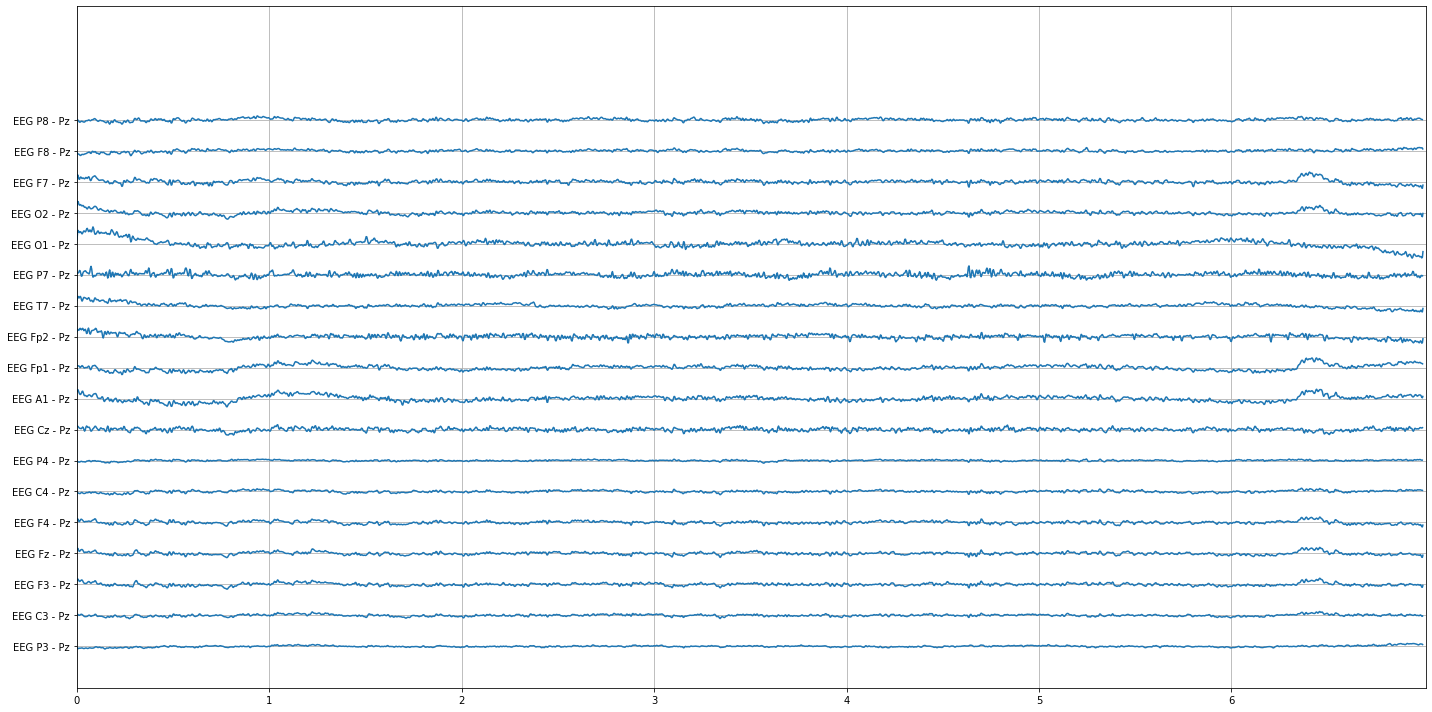

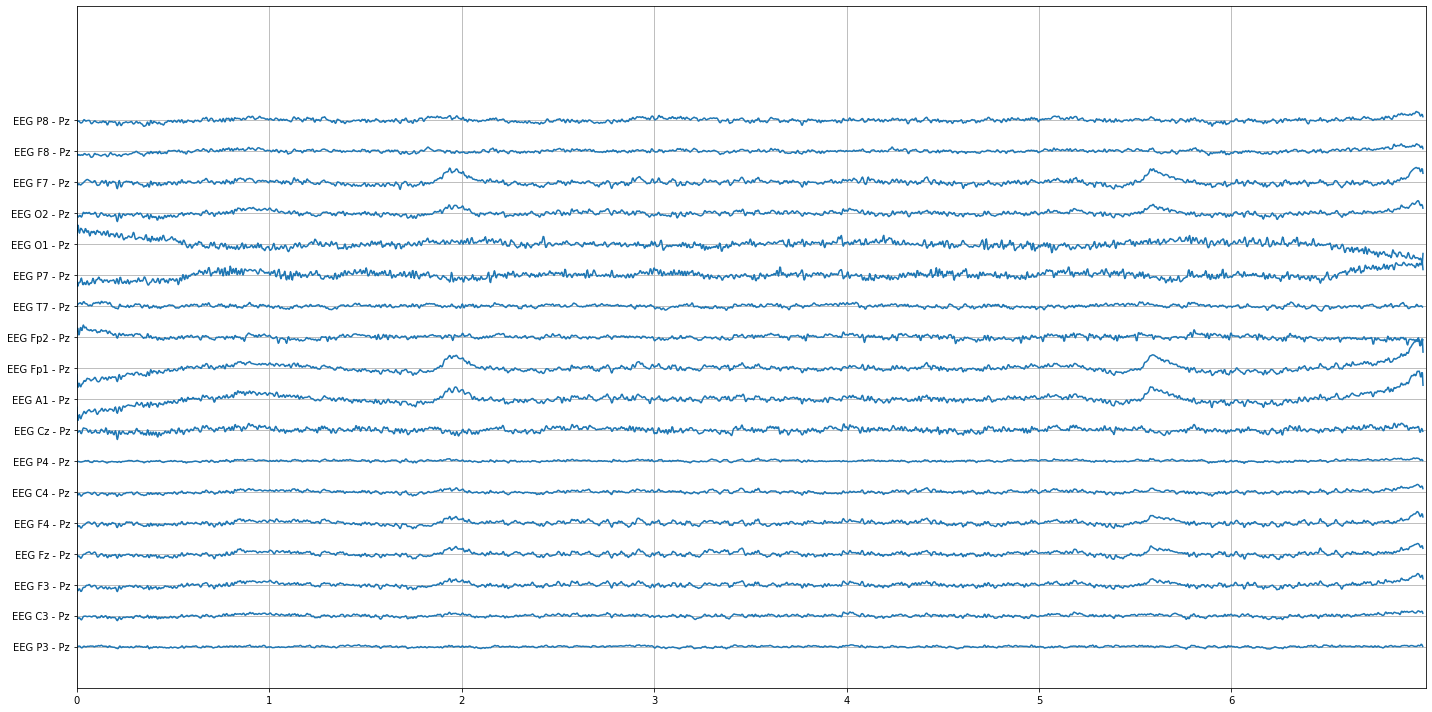

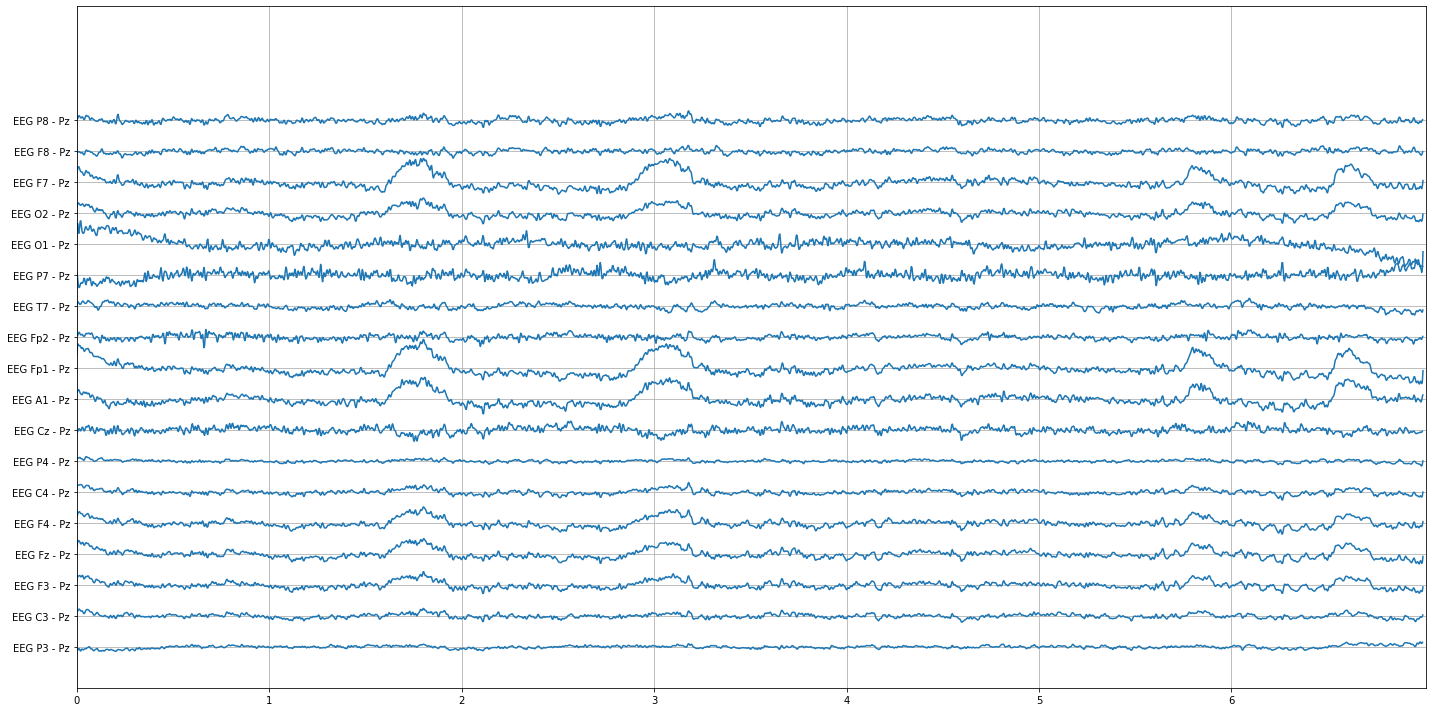

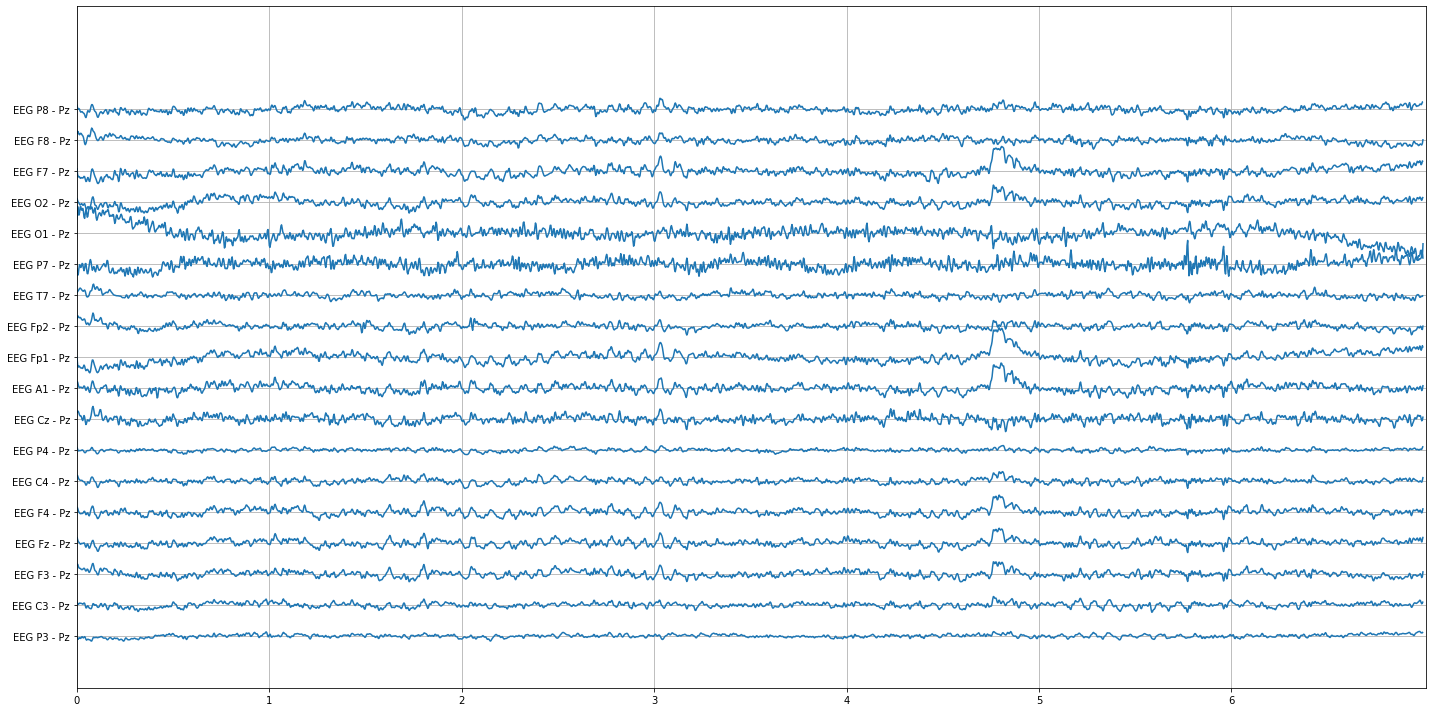

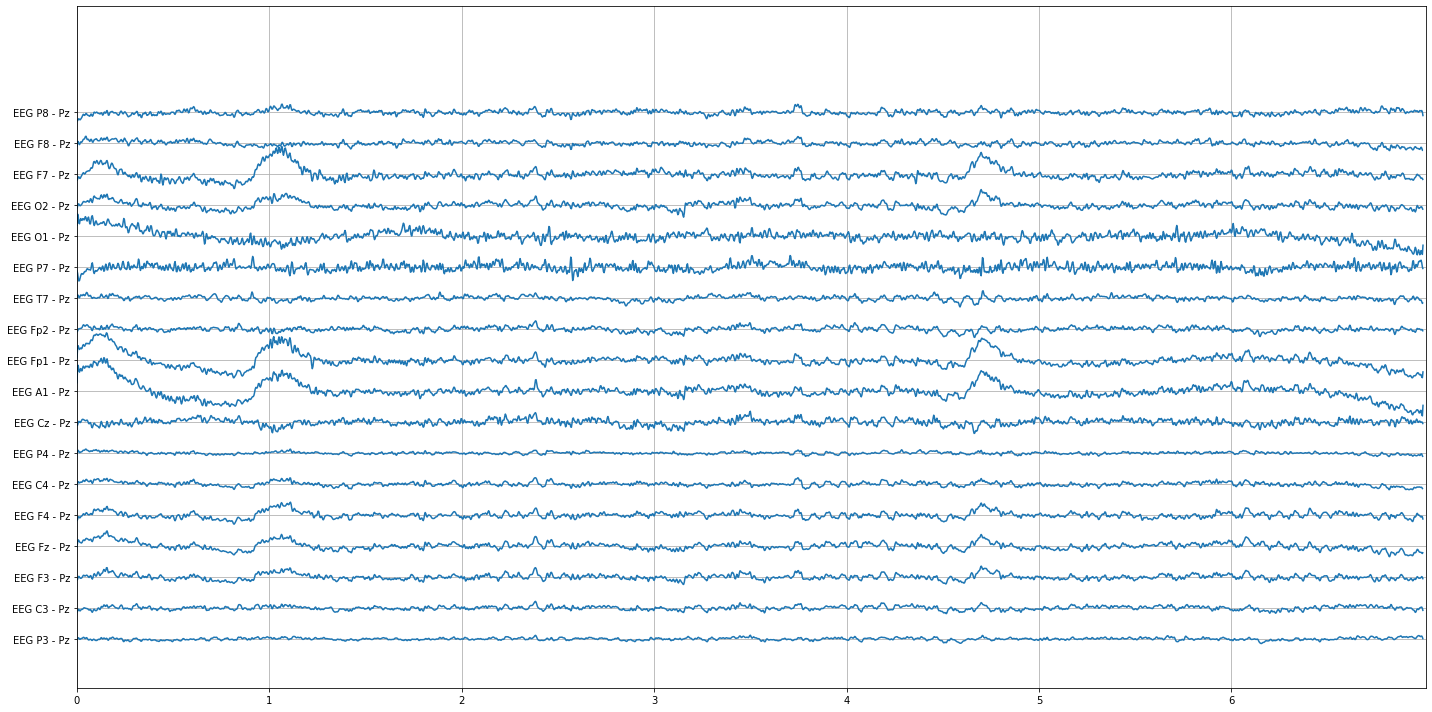

In [163]:
for i in range(5):
    plot_trail(track1_not_remember[i])

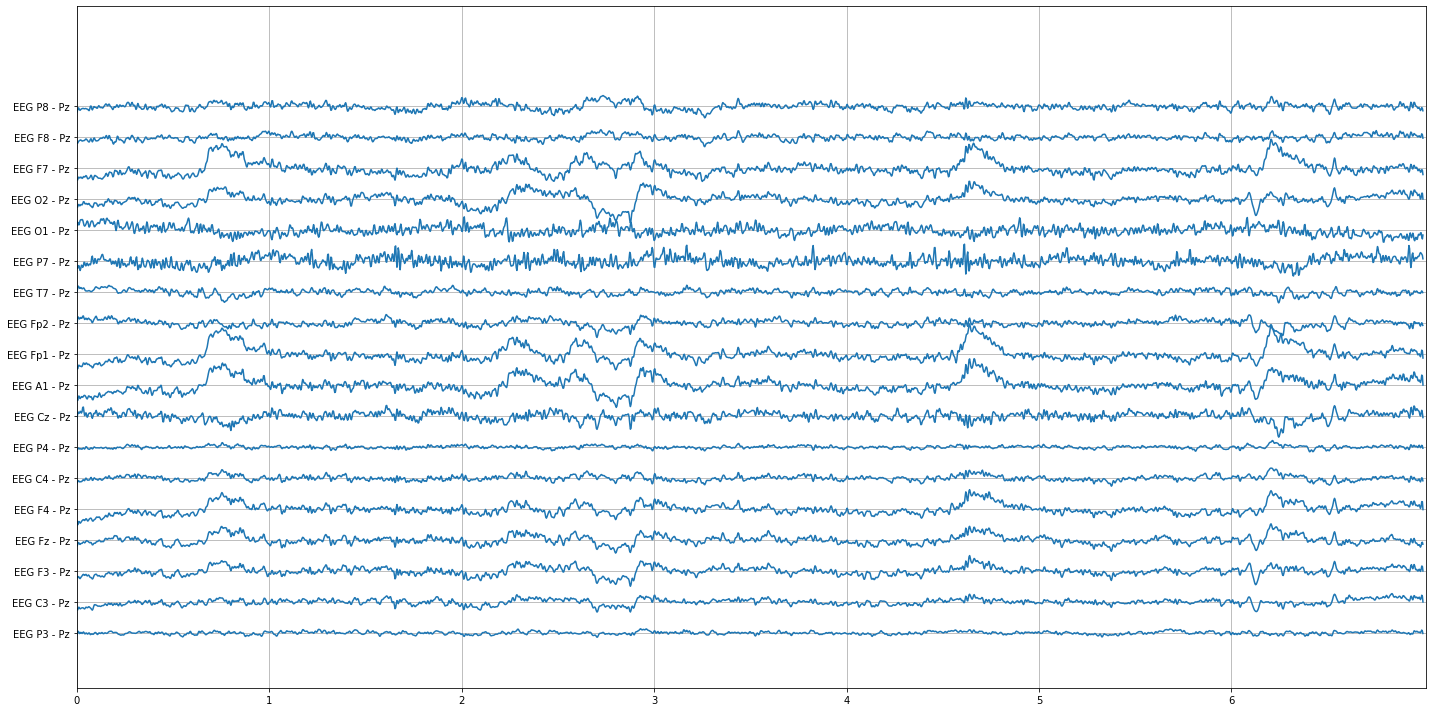

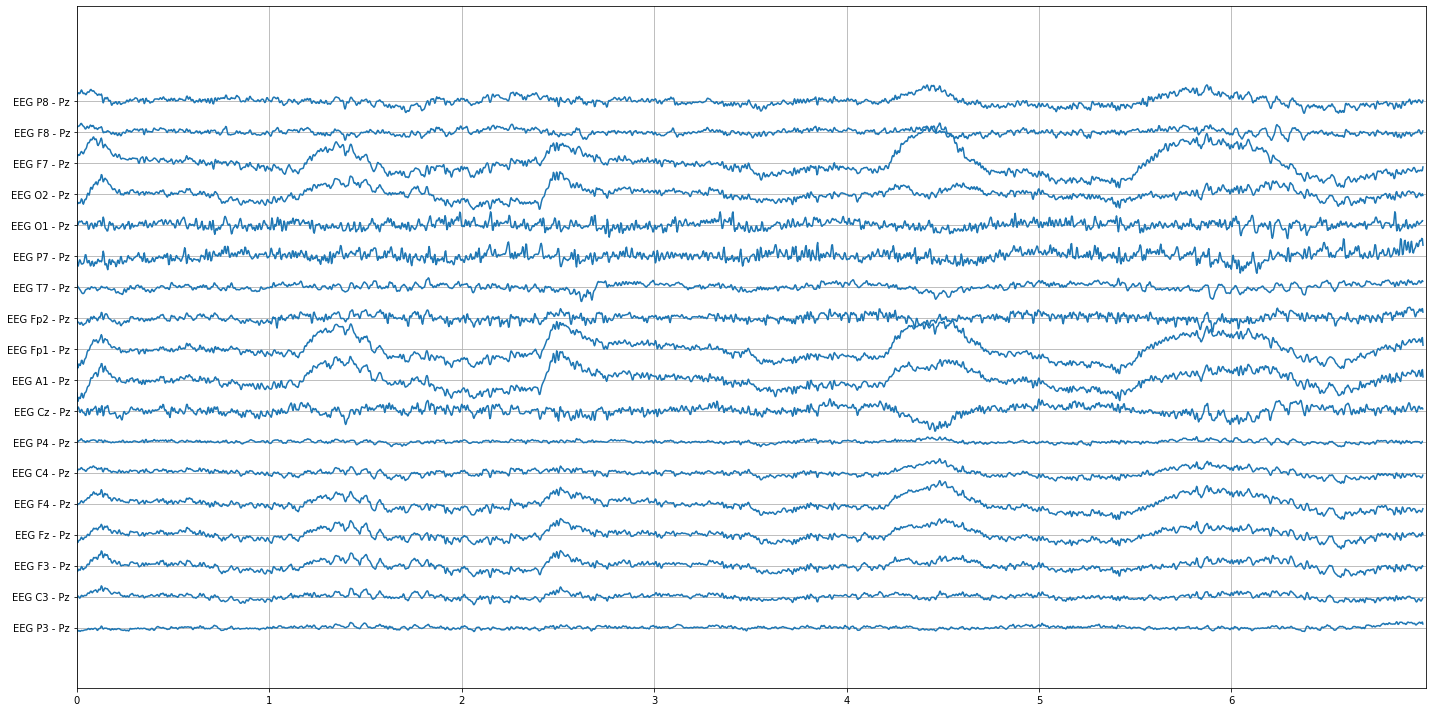

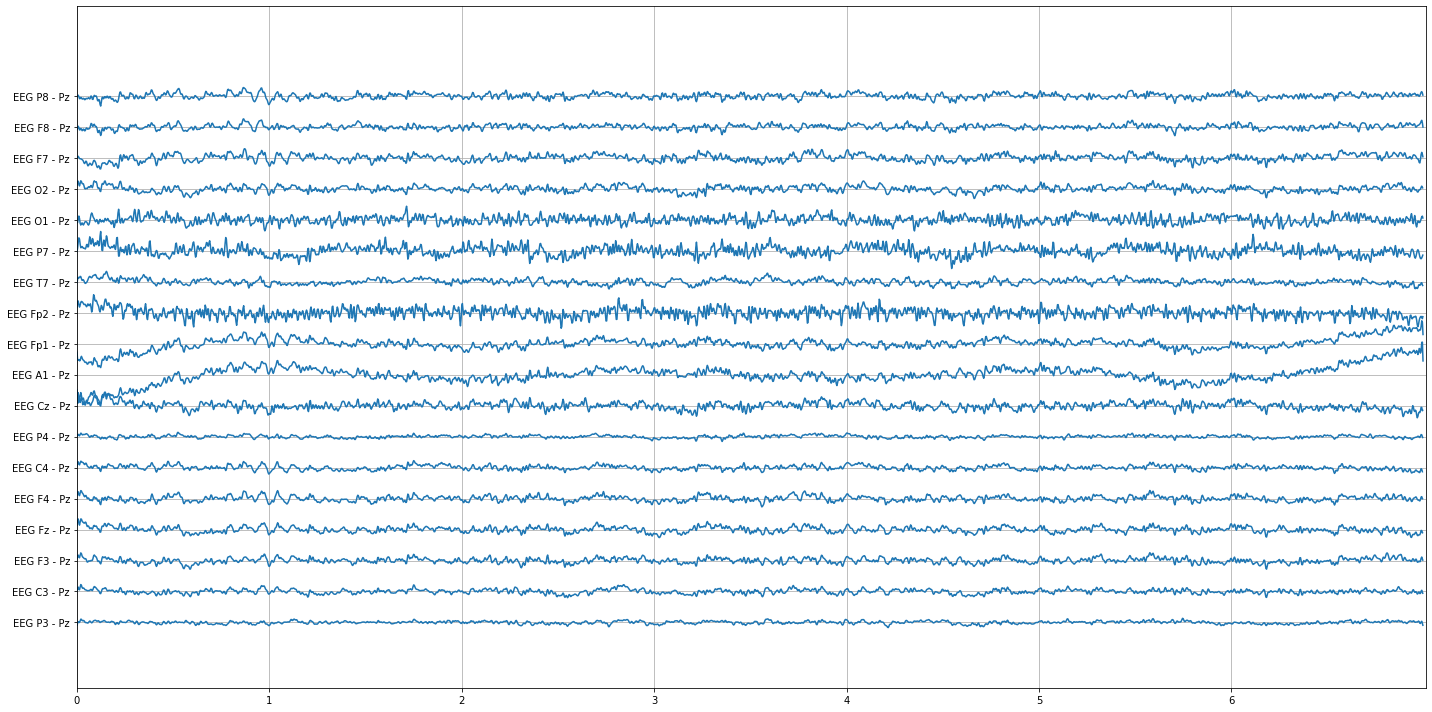

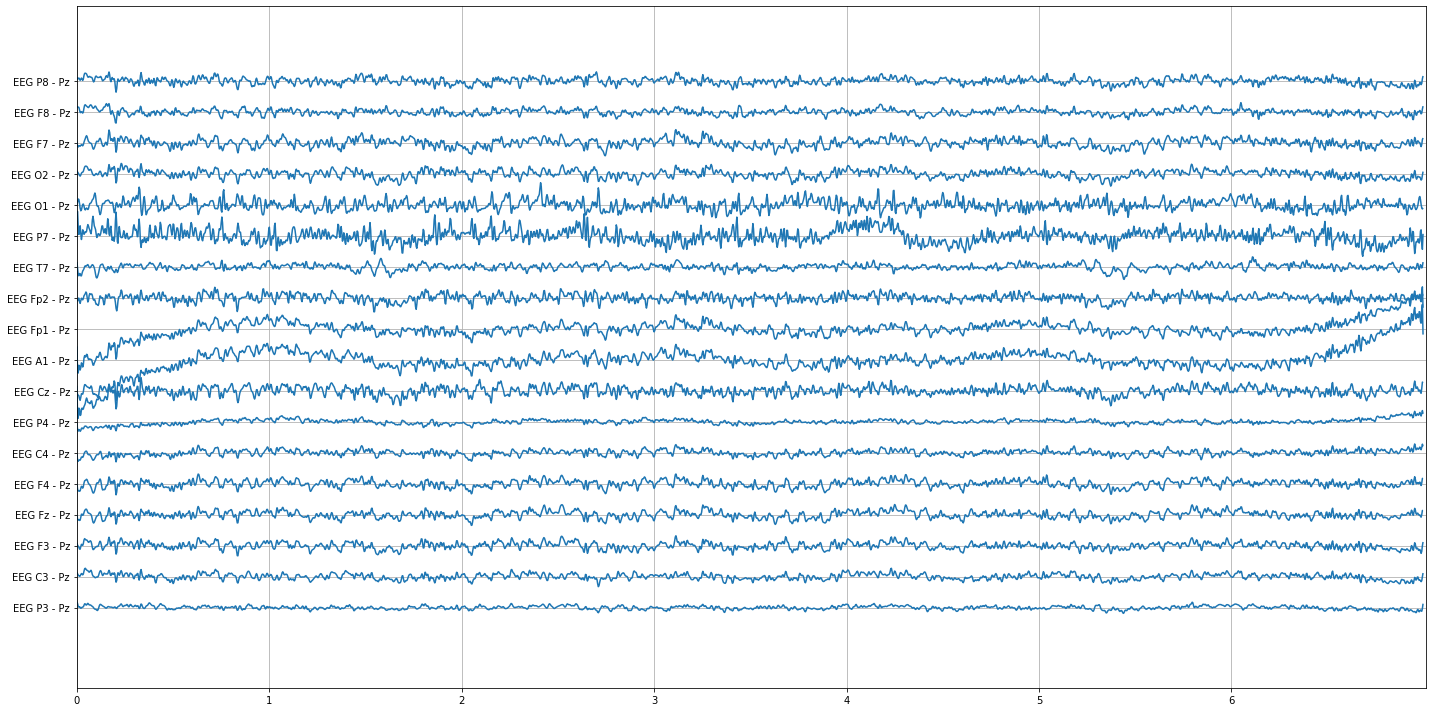

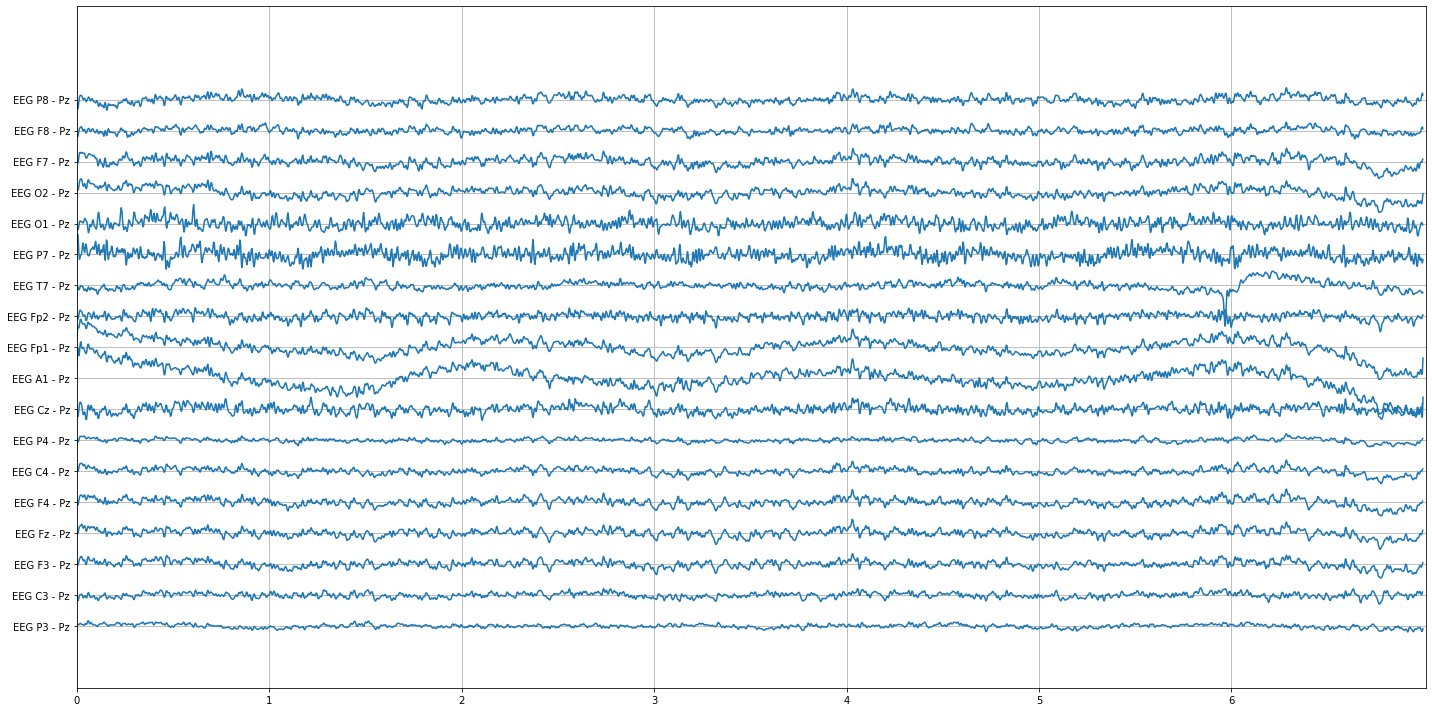

In [164]:
for i in range(5):
    plot_trail(track1_remember[i])